In [1]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# import the necessary Python libraries Numpy, Pandas and Matplotlib with their usual shorthand notation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Telco Customer Churn Datasets

## 1) Data Cleaning and Preparation

In [2]:
# load dataset
path = '/Users/hayaayu/Users/hayaayu/Self Development/Data Science/Dibimbing/Day11/Data/telco_customer_churn.csv'
raw_df_telco = pd.read_csv(path, index_col=0)
raw_df_telco.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# make a copy of data 
telco_df=raw_df_telco.copy()

# cek jumlah row dan column
telco_df.shape

(7043, 20)

**1. A. Check for Missing Values**

In [4]:
telco_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**1.B. Data Types**

In [6]:
# Get the data types of each attribute
telco_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Transform TotalCharges to Float

telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**1.C. Check for Null Value**

In [15]:
# Check is there any null value
telco_df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# percentage of null value
(11/7043)*100

0.1561834445548772

Karena null value <5% maka baris bisa didrop.

In [17]:
telco_df.loc[telco_df['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [18]:
#Removing missing values 
telco_df.dropna(how = 'any', inplace = True)

**1.D. Check Duplicated Values**

In [16]:
telco_df.duplicated()

customerID
7590-VHVEG    False
5575-GNVDE    False
3668-QPYBK    False
7795-CFOCW    False
9237-HQITU    False
              ...  
6840-RESVB    False
2234-XADUH    False
4801-JZAZL    False
8361-LTMKD    False
3186-AJIEK    False
Length: 7032, dtype: bool

In [22]:
#see duplicated rows
telco_df[telco_df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
9117-SHLZX,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1934-SJVJK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
8605-ITULD,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
9804-ICWBG,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
3247-MHJKM,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
5996-DAOQL,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2668-TZSPS,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
2636-ALXXZ,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
7096-UCLNH,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No


In [35]:
#drop duplicated values
telco_df = telco_df.drop_duplicates()

## 2) Statistical Summary

In [21]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

numericals = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']

In [22]:
# numerical statistical summary
telco_df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Observations :**
- `SeniorCitizen` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity.
- Overall the maximum and minimum value for each column seems reasonable.
- `tenure` is descrete value no need to conclude its simmetricity.
- `MonthlyCharges` have skewed distribution since mean < 50% median.
- `TotalCharges` have skewed distribution since mean > 50% median.

In [23]:
# categorical statistical summary
telco_df[categoricals].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


**Observations :**
- `Gender` has two unique value which are Male and Female, with Male as top value.
- `Partner`,`Dependents`, `PhoneService`, `PaperlessBilling`, `Churn` have two unique values which are Yes and No.
- `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`,`PaymentMethod` have thee unique values.

## 3) Univariate Analysis

### Boxplot to Detect Outliers

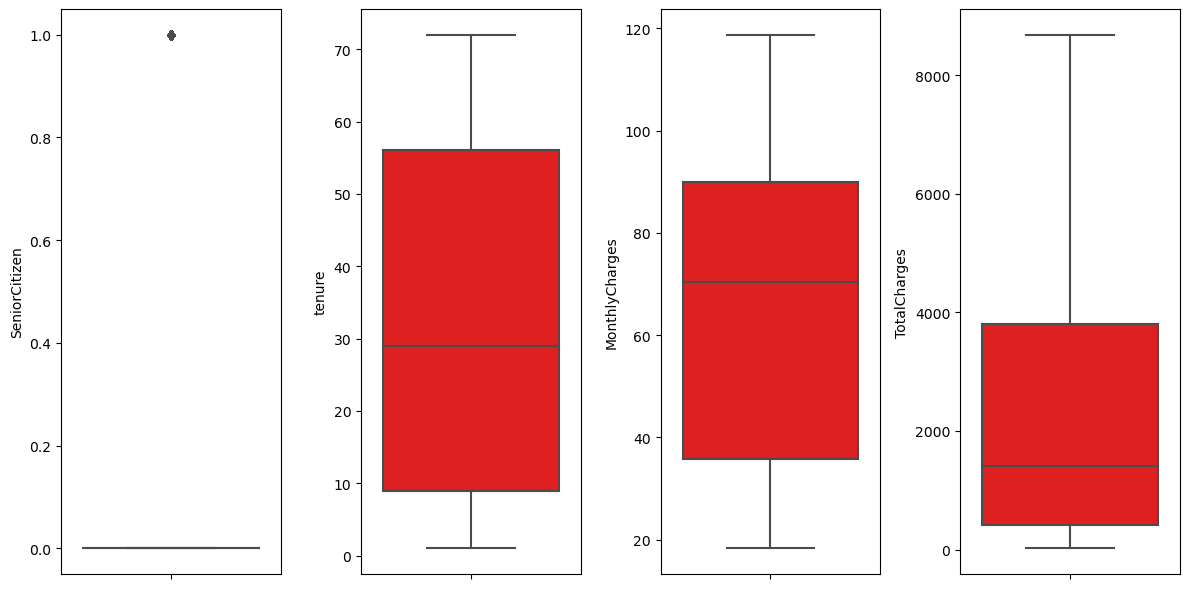

In [36]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=telco_df[features[i]], color='red')
    plt.tight_layout()

In [42]:
outlier = telco_df['SeniorCitizen'].max()

telco_df[telco_df['SeniorCitizen'] == outlier]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No


**Observations :**
- In `SeniorCitizen` column for 1 (True for Senior Citizen) detected as outlier because the percentage of senior citizen way fewer than the one is not Senior Citizen. 
- However, this is reasonable since there are just two discrete values which are 1 (True) and 0 (False).

### KDE Plot for Understanding the Distribution

/var/folders/fg/krtq436d69j26xdl9vf3cjn80000gn/T/ipykernel_8913/1843564632.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=telco_df[features[i]], color='skyblue')
/var/folders/fg/krtq436d69j26xdl9vf3cjn80000gn/T/ipykernel_8913/1843564632.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

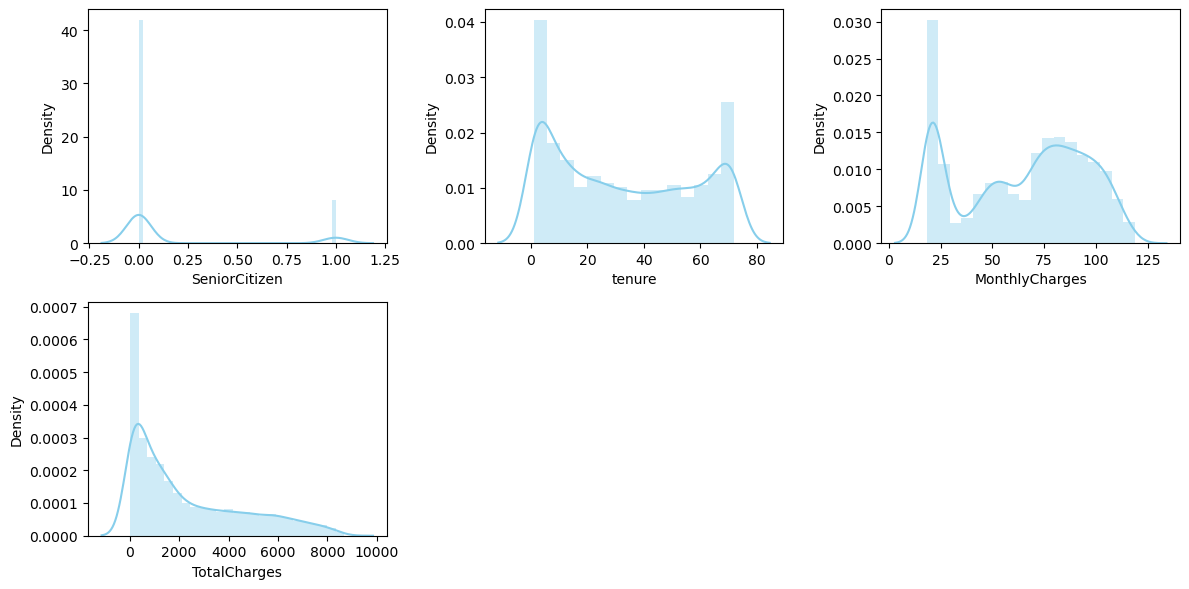

In [47]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=telco_df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

**Observations :**
- For column `SeniorCitizen` and `tenure` no need to interpret since those column contain discrete values.
- For column `MonthlyCharges` is not distributed normally (not symmetric) but it's still reasonable, since we're talking about charges means there are more people who would choose cheaper options.
- For column `TotalCharges` is not distributed normally or skewed. Nevertheless, it's still reasonable because it's the reflection of `MonthlyCharges` column.

## 4) Multivariate Analysis

**1. How was the relationship between Tenure and Total Charges?**

Text(0, 0.5, 'Total Charges')

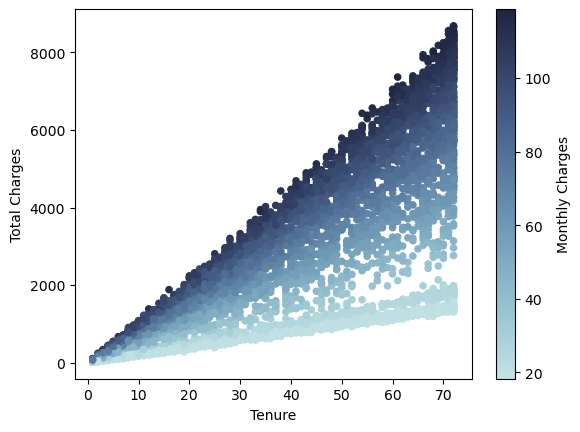

In [15]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(telco_df['tenure'], telco_df['TotalCharges'], c=telco_df['MonthlyCharges'], s=20, cmap=cmap)
f.colorbar(points, label='Monthly Charges')

# Add labels 
ax.set_xlabel('Tenure')
ax.set_ylabel('Total Charges')

**Insights :**
- Overall, with more tenures, the higher the Total Charges will be. This is quite obvious because the longer the subscription, the total charges will be higher.
- The colors of the points in the scatterplot represent Monthly Charges, it can be concluded that overall the higher the Monthly Charges, the higher the Total Charges will be, as can be seen from the dark blue color at the top and light blue at the bottom.

**2. How long did churned people who are paying for the service usually stay in the service compared to current customers? And what was their average LTV (Life Time Value)?**

Text(0, 0.5, 'Frequency')

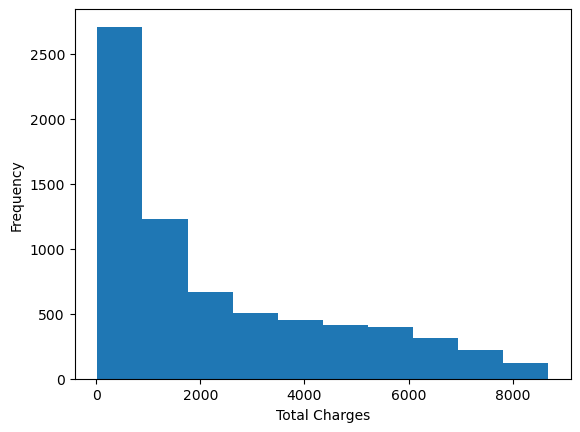

In [16]:
# Check the Distribution

plt.hist(data = telco_df, x = 'TotalCharges');

plt.xlabel('Total Charges')
plt.ylabel('Frequency')

Because about 80% of the data is extremely skewed and the data is not evenly distributed, therefore I divide the data into 2: 80% and 20%.

In [17]:
#Feature Engineering and Devide the Data

def churn_charges(TotalCharges):
    if TotalCharges > 2840.41:
        return 'High LTV (20%)'
    else:
        return 'Low LTV (80%)'
    
telco_df['LTV_category'] = telco_df['TotalCharges'].apply(churn_charges)
telco_df['LTV_category'].unique()

array(['Low LTV (80%)', 'High LTV (20%)'], dtype=object)

In [18]:
# Churn Stat
telco_df[(telco_df['Churn'] == 'Yes')].groupby('LTV_category').describe().transpose()

LTV_category          High LTV (20%)  Low LTV (80%)
SeniorCitizen  count      374.000000    1495.000000
               mean         0.334225       0.234783
               std          0.472351       0.424005
               min          0.000000       0.000000
               25%          0.000000       0.000000
               50%          0.000000       0.000000
               75%          1.000000       0.000000
               max          1.000000       1.000000
tenure         count      374.000000    1495.000000
               mean        50.133690       9.935117
               std         12.334841      10.742349
               min         27.000000       1.000000
               25%         40.000000       1.000000
               50%         49.500000       6.000000
               75%         60.000000      15.000000
               max         72.000000      61.000000
MonthlyCharges count      374.000000    1495.000000
               mean        95.664305      69.132040
               std         13.356834      23.983702
               min         45.250000      18.850000
               25%         88.625000      50.525000
               50%         99.475000      74.900000
               75%        104.800000      86.725000
               max        118.350000     112.950000
TotalCharges   count      374.000000    1495.000000
               mean      4811.723262     711.265819
               std       1436.724288     766.848197
               min       2841.550000      18.850000
               25%       3522.462500      85.025000
               50%       4571.100000     371.650000
               75%       5891.212500    1128.225000
               max       8684.800000    2839.650000

In [19]:
# Churn Sum
telco_df[(telco_df['Churn'] == 'Yes')].groupby('LTV_category').sum().transpose()

LTV_category,High LTV (20%),Low LTV (80%)
SeniorCitizen,125.00,351.0
tenure,18750.00,14853.0
MonthlyCharges,35778.45,103352.4
TotalCharges,1799584.50,1063342.4


Text(0.5, 0, 'LTV Category')

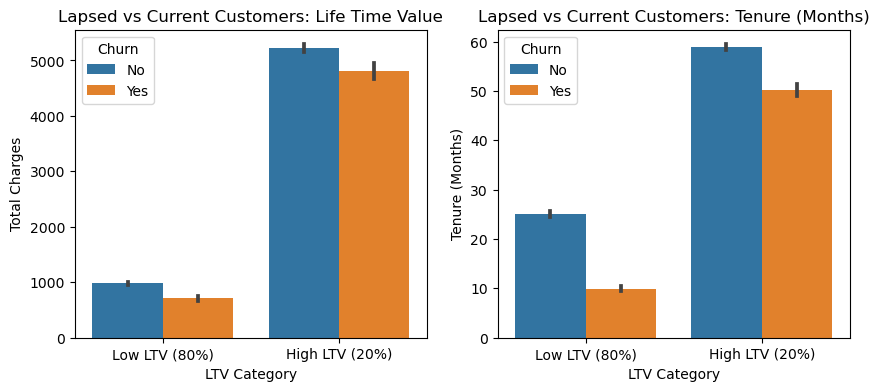

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=telco_df, x='LTV_category', y='TotalCharges', hue='Churn', ax=ax1)
ax1.title.set_text('Lapsed vs Current Customers: Life Time Value')
ax1.set_ylabel('Total Charges')
ax1.set_xlabel('LTV Category')

sns.barplot(data=telco_df, x='LTV_category', y='tenure', hue='Churn', ax=ax2)
ax2.title.set_text('Lapsed vs Current Customers: Tenure (Months)')
ax2.set_ylabel('Tenure (Months)')
ax2.set_xlabel('LTV Category')

**Insights :**

- 80% Low LTV from lapsed customers only subscribing for less than 10 months.
- The average of 80% Low LTV from lapsed customers is 700 dollars.
- The average of 20% High LTV lapsed customers is 4800 dollars.
- Ratio between Low LTV : High LTV = 1 : 1.7
- By focusing on returning 20% of customers, we can bring back 60% of revenue (1.7/2.7)

**3. How's the Churn Rate Based on Contract Type?**

<Figure size 2000x600 with 0 Axes>

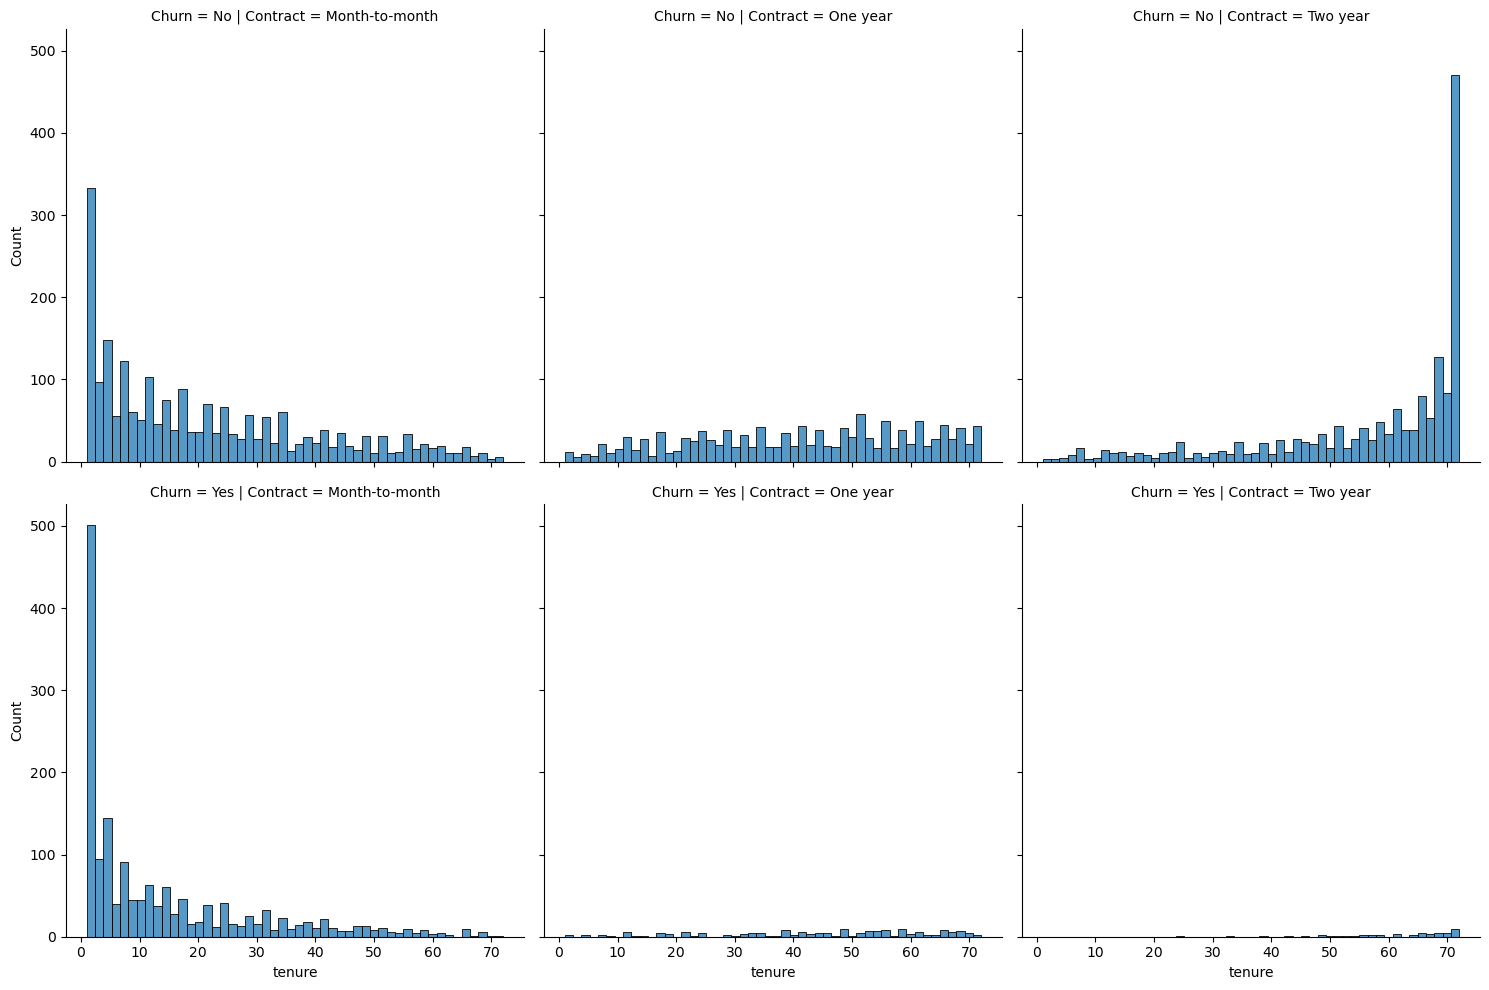

In [21]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=telco_df,x='tenure',bins=50,col='Contract',row='Churn');

**Insights :**

- Customers with shorter contract durations are more likely to be Churned/Lapsed. On the other hand, customers with longer contracts tend to be churned lower.

**Actions:**
- Customers can be encouraged to take long contracts to avoid Churnes/Lapsed cases.
- Provide reminders for customers with month-to-month contracts.

**4. How's the Churn Rate based on Monthly Charges and Total Charges?**

Text(0, 0.5, 'Total Charges')

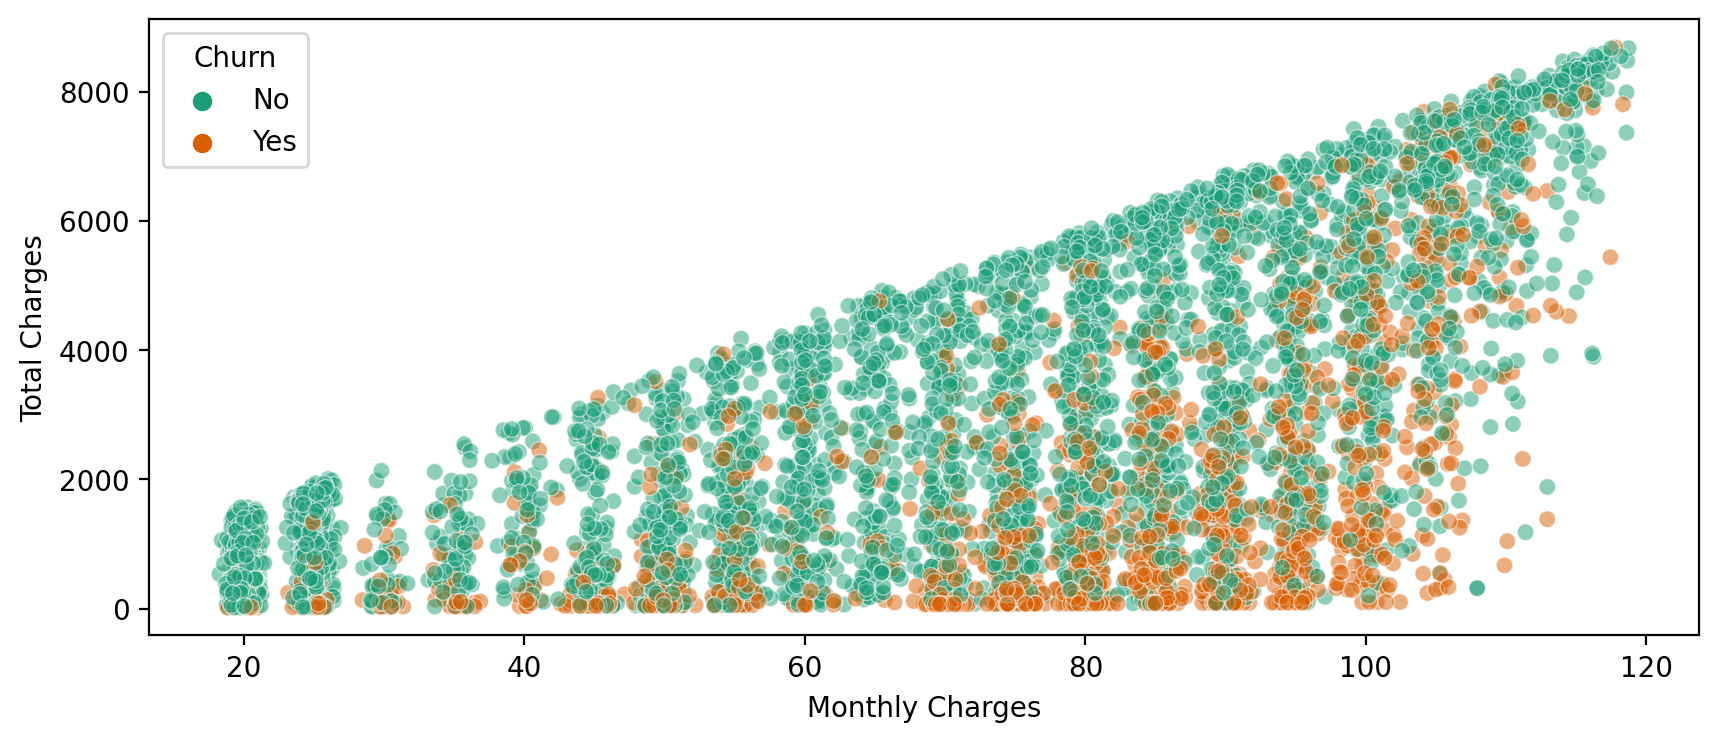

In [22]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=telco_df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')

**Insights :**
- Churn rate tends to be higher for high monthly charges customers than for low monthly charges customers.
- The possible cause is excessive usage which is not controlled by the customer so that the customer feels he has no control over his usage and decides to unsubscribe.

**Actions:**
- Provide regular customer usage reminders.
- Create a usage plan for each customer so it's not excessive.

**5. How's the Churn Rate Based on Tenure Month?**

In [23]:
no_churn = telco_df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = telco_df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [24]:
#churn rate
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [25]:
churn_rate = churn_rate.transpose()

In [26]:
churn_rate

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group,LTV_category
tenure,,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
69,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053
70,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697


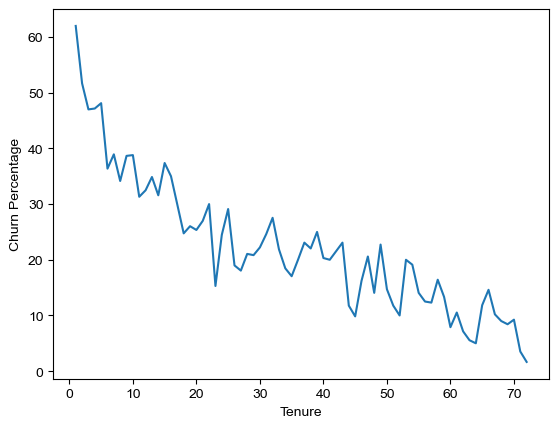

In [27]:
# Plot Tenure vs Churn Percentage
sns.lineplot(x = "tenure", y = "gender",data=churn_rate)
sns.set(style='dark')
plt.ylabel('Churn Percentage')
plt.xlabel('Tenure')
plt.show()

**Insights :**
    
- Customers tend to unsubscribe at the start of the tenure, so this must be considered.
- This indicates that the first 20 months is a critical period where customers are very likely to decide to unsubscribe.

**Actions:**
- Focus on new customers, provide service, ask complaints, solving customers' pain points etc.


**6. How's the Churn Rate based on Demographic Information?**

In [28]:
## Count each value for Demographic Information
# Gender, Dependent, Partner, Senior Cetizens

gender_count = telco_df.groupby(['gender','Churn'], as_index=False).size()
dependents_count = telco_df.groupby(['Dependents','Churn'], as_index=False).size()
partner_count = telco_df.groupby(['Partner','Churn'], as_index=False).size()
seniors_count = telco_df.groupby(['SeniorCitizen','Churn'], as_index=False).size()

In [29]:
#Feature Engineering and Devide the Data

def seniors(SeniorCitizen):
    if SeniorCitizen == 1:
        return 'Yes'
    elif SeniorCitizen == 0:
        return 'No'
    
seniors_count['senior_citizen'] = seniors_count['SeniorCitizen'].apply(seniors)
seniors_count['senior_citizen'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: xlabel='size', ylabel='senior_citizen'>

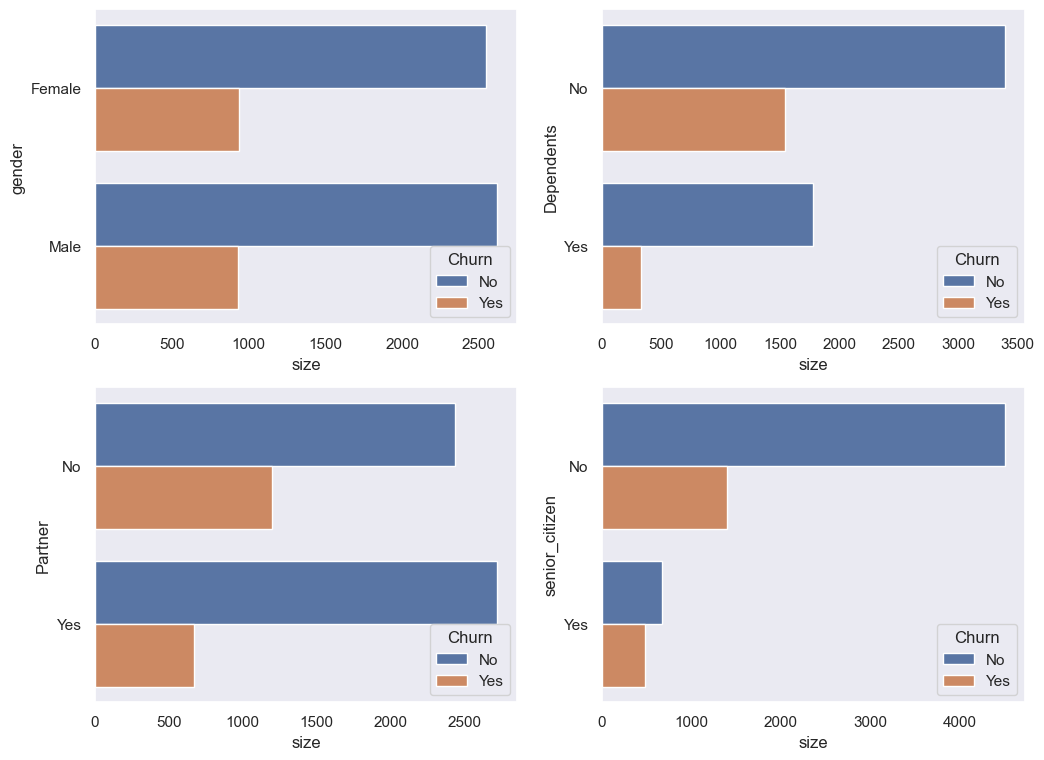

In [30]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12,9))

sns.barplot(data=gender_count, x='size', y='gender', hue='Churn', ax=axes[0,0])
sns.barplot(data=dependents_count, x='size', y='Dependents', hue='Churn', ax=axes[0,1])
sns.barplot(data=partner_count, x='size', y='Partner', hue='Churn', ax=axes[1,0])
sns.barplot(data=seniors_count, y='senior_citizen', x='size', hue='Churn', ax=axes[1,1])

**Insights :**
- Even distribution of churn between Female and Male.
- Customers who do not have dependents tend to lapse. But as a whole, the number of our customers who do not have dependents is larger.
- Customers who do not have partners tend to lapse. This is in contrast to current customers where the distribution is quite even between those who have partners and those who do not.
- Fewer senior citizens tend to lapse, but the overall number of our customers who is non-senior citizens larger.

**Actions:**
- Customers who don't have a partner may have more freedom in choosing their provider so it's easier to lapse.
- Need special treatment and attention for customers who do not have partners.

**7. How's the Corellation between Feature and Churn?**

In [31]:
# Encoding
telco_df = telco_df.join(pd.get_dummies(telco_df[['Partner', 
                                                  'Dependents',
                                                  'PhoneService',
                                                  'MultipleLines',
                                                  'InternetService',
                                                  'OnlineSecurity', 
                                                  'OnlineBackup',
                                                  'DeviceProtection',
                                                  'TechSupport',
                                                  'StreamingTV', 
                                                  'StreamingMovies', 
                                                  'Contract', 
                                                  'PaperlessBilling', 
                                                  'PaymentMethod',
                                                  'Churn']]))

In [37]:
corr_df  = pd.get_dummies(telco_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()
corr_df["Churn_Yes"].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

<Axes: >

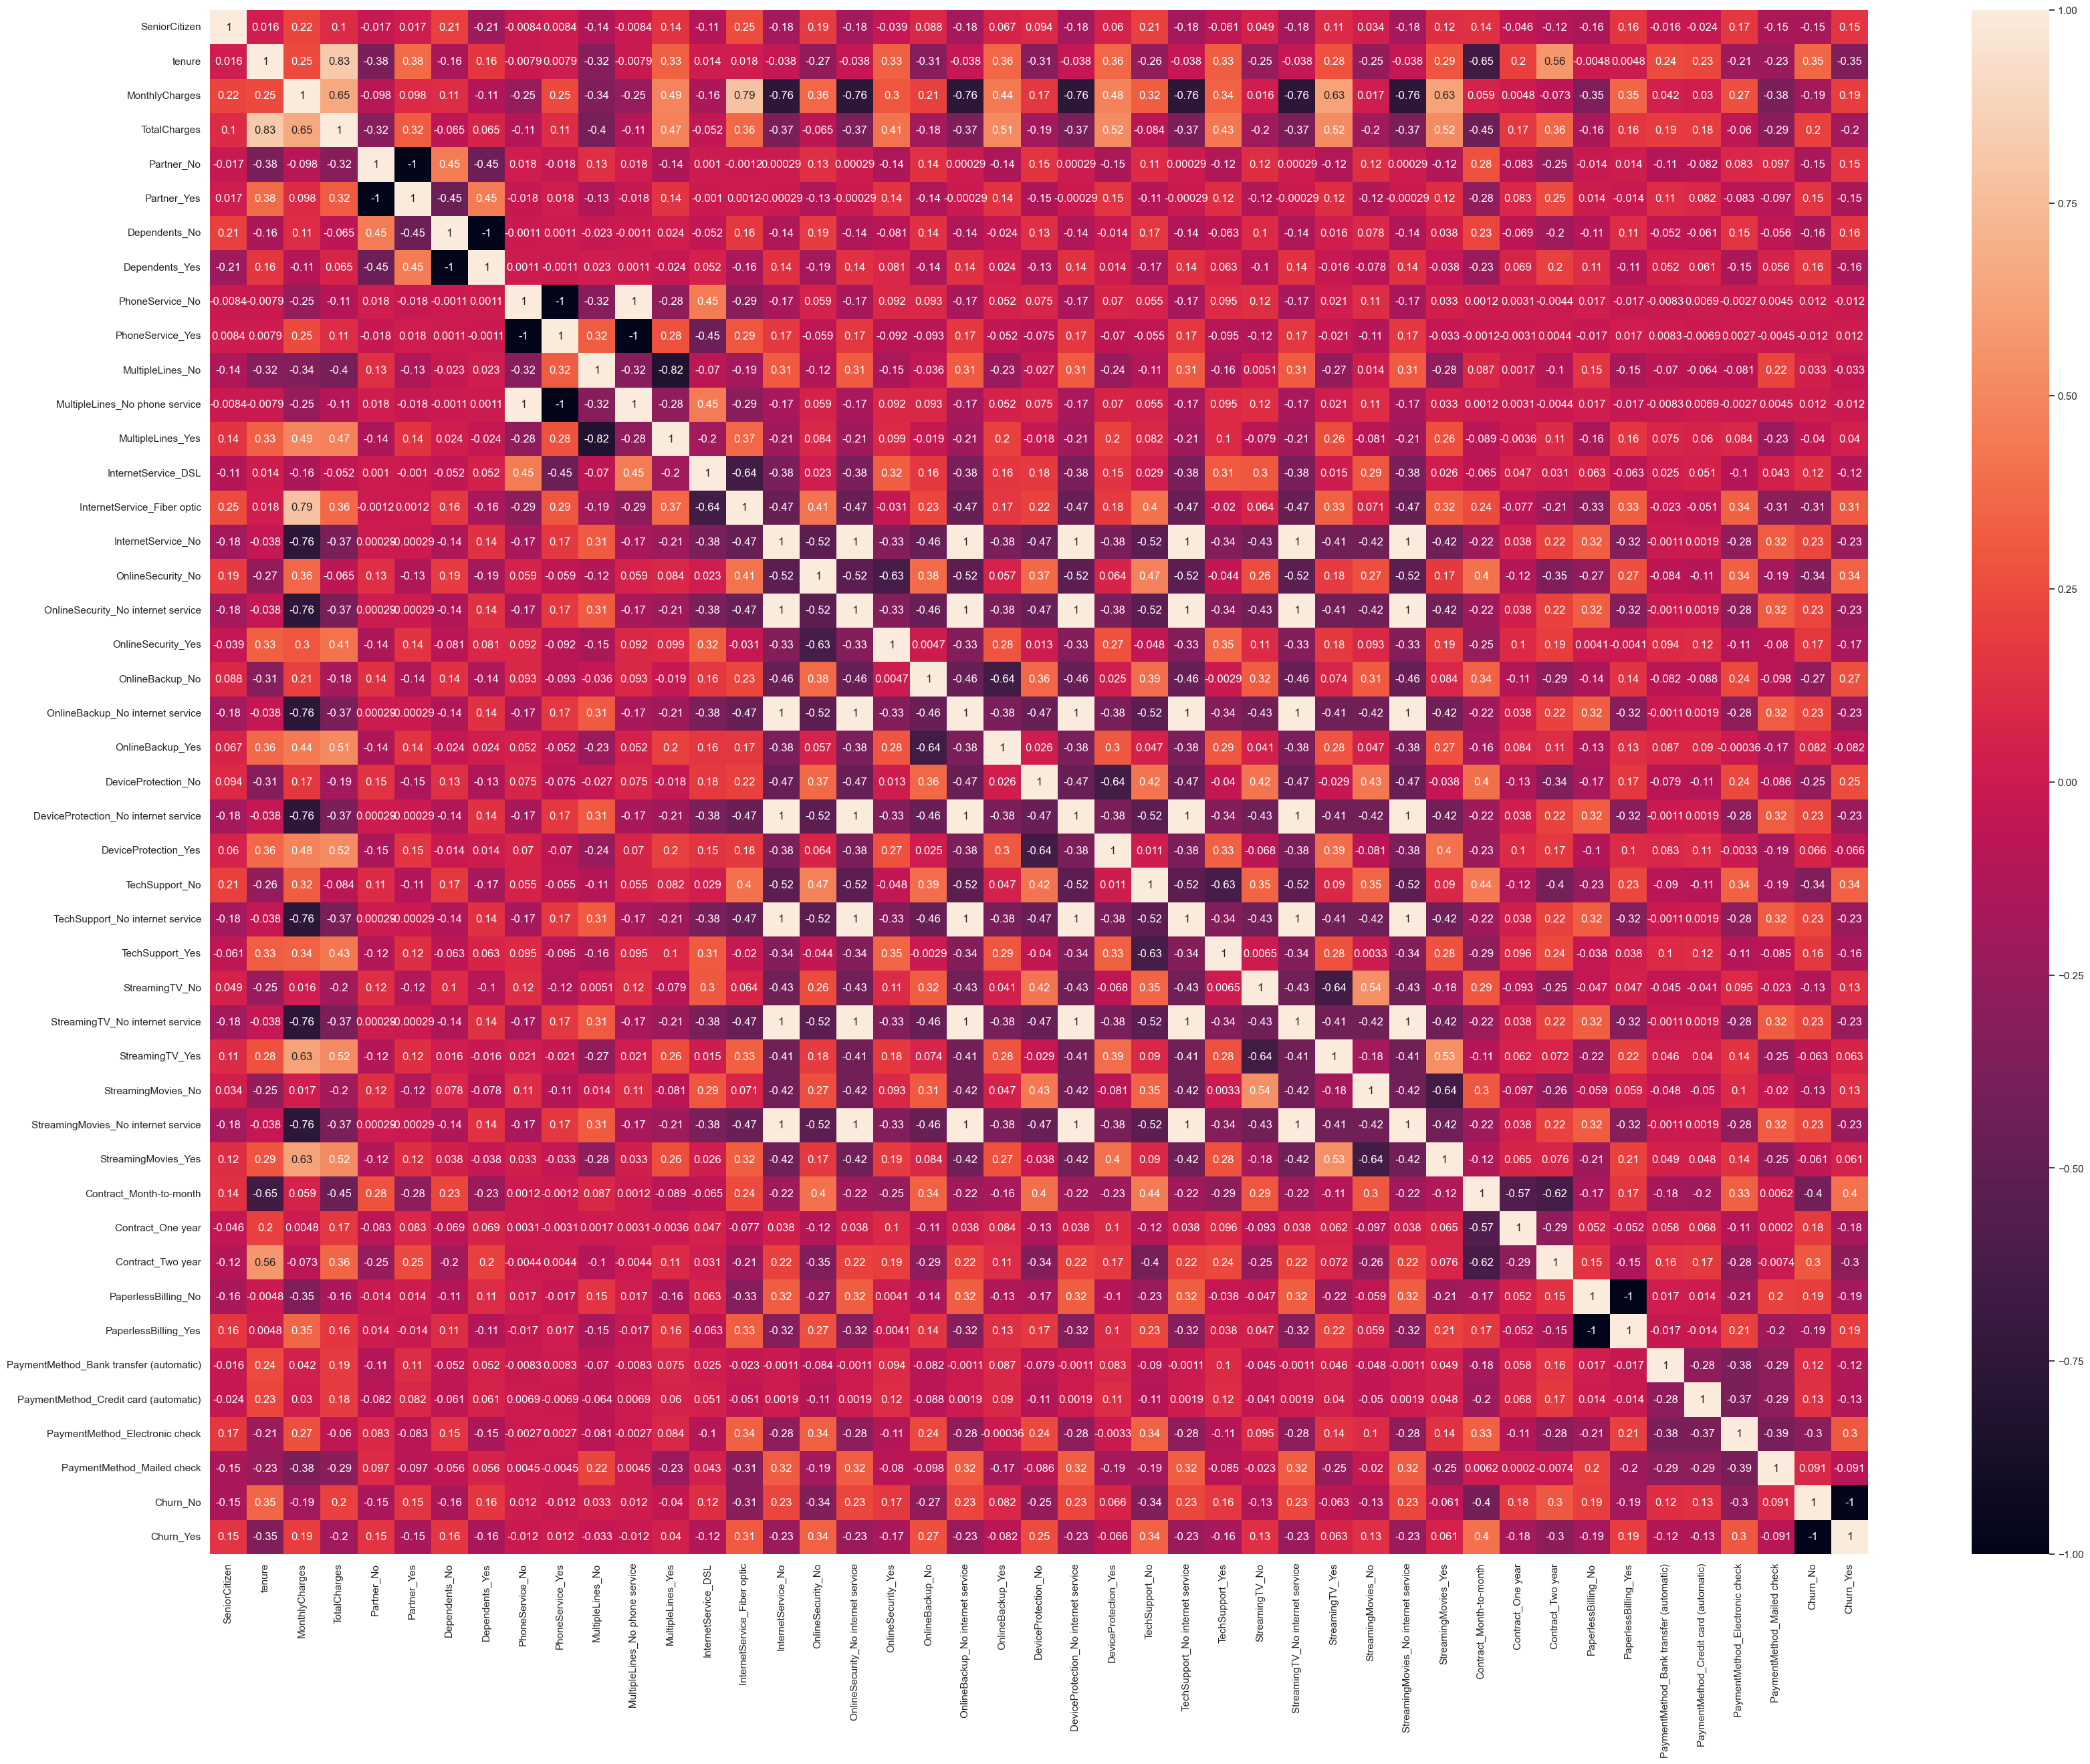

In [38]:
plt.figure(figsize=(40, 30))
sns.heatmap(telco_df.corr(), annot = True)

**Insights:**
- There is no significant correlation between service type and Churn.
- The highest correlation with Churn is influenced by Contract payments, so this is what needs more attention.
- To avoid churn, we can really offer contract payments of the type per year rather than per month.

## 5) Deep Dive Exploration

 **1) Top 10 Active Customer Based on Total Charges**

In [48]:
# retrieve active customer from datasets
active_cust = telco_df[telco_df['Churn']=='No']

In [52]:
top10_cust = (active_cust
            .groupby('customerID')
            .agg(total_spend=('TotalCharges','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_cust

,customerID,total_spend
3900,7569-NMZYQ,8672.45
5006,9739-JLPQJ,8670.10
5039,9788-HNGUT,8594.40
4573,8879-XUAHX,8564.75
5113,9924-JPRMC,8547.15
334,0675-NCDYU,8543.25
3422,6650-BWFRT,8529.50
70,0164-APGRB,8496.70
754,1488-PBLJN,8477.70
4629,8984-HPEMB,8477.60


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '7569-NMZYQ'),
  Text(1, 0, '9739-JLPQJ'),
  Text(2, 0, '9788-HNGUT'),
  Text(3, 0, '8879-XUAHX'),
  Text(4, 0, '9924-JPRMC'),
  Text(5, 0, '0675-NCDYU'),
  Text(6, 0, '6650-BWFRT'),
  Text(7, 0, '0164-APGRB'),
  Text(8, 0, '1488-PBLJN'),
  Text(9, 0, '8984-HPEMB')])

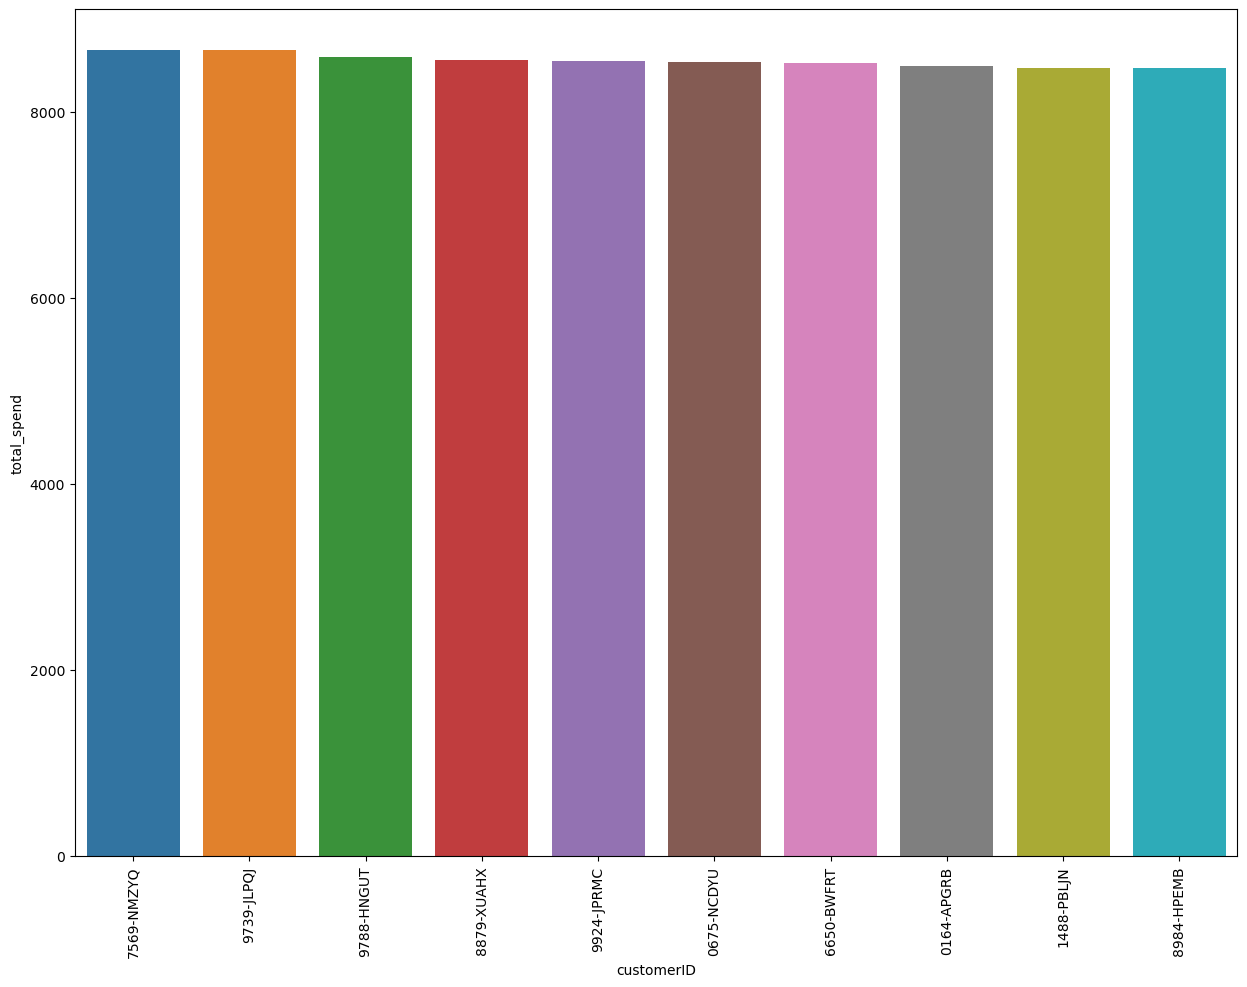

In [55]:
# visualize it
plt.figure(figsize=(15,11))
top10_cust['customerID'] = top10_cust['customerID'].astype(str)
sns.barplot(data=top10_cust, x='customerID', y='total_spend')
plt.xticks(rotation=90)

**2) What kind of Product Contract Sold the Most?**

In [58]:
contract = (telco_df
            .groupby('Contract')
            .agg(total_customer=('Contract','count'))
            .reset_index()
            .sort_values('total_customer',ascending=False))

contract

,Contract,total_customer
0,Month-to-month,3853
2,Two year,1685
1,One year,1472


(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'Two year'),
  Text(2, 0, 'One year')])

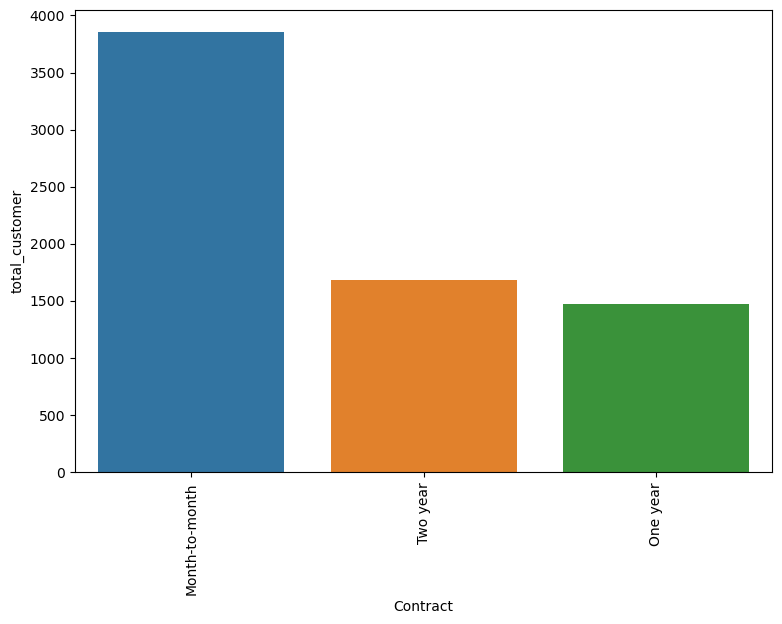

In [60]:
# visualize it
plt.figure(figsize=(9,6))
contract['Contract'] = contract['Contract'].astype(str)
sns.barplot(data=contract, x='Contract', y='total_customer')
plt.xticks(rotation=90)

**Observations :**
- From the previous analysis, it was concluded that the contract payment has a strong relationship with Customer Churn.
- The most chosen contract type is month-to-month.
- From this visualization we know that we have done homework to encourage our customers to change payment contracts to yearly contracts to avoid churning.